In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/TrainData of Project1.zip')
test_df = pd.read_csv('/content/Test.zip')
train_df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,M9ERLMQ,0,9.404683e+03,3.726288e+03,3.726288e+03,7.445963e+03,2.017008e+04,4.034016e+04,5.107963e+03,4.950751e+03,...,0,0,0,0,38.0,35.0,25.0,14.0,11.0,6.0
17517,M1W6L8S,0,6.563830e+04,1.910968e+04,1.761840e+04,3.523681e+04,4.639897e+03,1.422805e+04,4.775029e+04,6.006875e+04,...,1,0,1,0,155.0,145.0,90.0,31.0,21.0,12.0
17518,MD5BL5K,0,4.220941e+04,3.173771e+04,2.539017e+04,2.539017e+04,1.005050e+04,8.040400e+03,4.354578e+04,4.097184e+04,...,0,0,0,0,2.0,2.0,2.0,4.0,4.0,2.0
17519,MYLOQ8Y,0,7.048496e+04,9.814610e+04,9.814610e+04,1.080079e+05,1.317389e+05,1.359192e+05,5.724762e+04,5.605762e+04,...,0,1,0,1,35.0,34.0,11.0,10.0,9.0,4.0


In [ ]:
test_df

,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,...,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,...,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,...,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,...,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,...,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,OL0I6O5R,3.862726e+04,3.501103e+04,2.825183e+04,2.813549e+04,3.670330e+04,3.316264e+04,6.330923e+03,1.489258e+04,4.805880e+03,...,0,0,0,0,6.0,6.0,4.0,5.0,5.0,1.0
20438,OL0I65ZW,2.578050e+04,1.933538e+04,1.546830e+04,1.546830e+04,1.948715e+04,1.558972e+04,1.313231e+04,1.407065e+04,1.288176e+04,...,0,1,0,1,9.0,9.0,9.0,7.0,7.0,7.0
20439,OL0I6CXW,1.755580e+05,1.406457e+05,1.125832e+05,1.125832e+05,1.253004e+05,1.022403e+05,6.141444e+04,7.859983e+04,6.033025e+04,...,1,2,1,2,27.0,27.0,18.0,10.0,10.0,5.0
20440,O2VIUO,6.806643e+04,6.338058e+04,6.413642e+04,6.413642e+04,7.082305e+04,7.078595e+04,2.017906e+04,1.849832e+04,4.015468e+04,...,0,0,0,0,2.0,2.0,0.0,9.0,9.0,3.0


In [ ]:
# Check columns for Null values
def null_cols(d,columns):
  na = d[columns].isna().sum().sort_values(ascending=False)
  return na[na > 0].index.to_list()

In [ ]:
# Replace all null values
def replace_null(X,cols):
  na_cols = null_cols(X,cols)
  print('1.Null columns',len(na_cols))

  if len(na_cols) > 0:
    X[na_cols]= X[na_cols].fillna(method='ffill')
    X[na_cols]= X[na_cols].fillna(method='bfill')
    na_cols = null_cols(X,cols)
    print('2.Null columns',len(na_cols))

In [ ]:
target = 'Col2'
num_cols = train_df.select_dtypes(include="number").columns
cat_cols = list(set(train_df.columns) - set(num_cols))
corr = train_df.corr()

In [ ]:
k= 50
cols = corr.nlargest(k,target)[target].index
print(cols)
cm = train_df.loc[:,cols].corr()
col_x = list(set(cols) - set([target]))
X, Y = train_df.loc[:,col_x] ,train_df.loc[:,target]
replace_null(X,col_x)

Index(['Col2', 'Col440', 'Col636', 'Col243', 'Col437', 'Col627', 'Col431',
       'Col234', 'Col240', 'Col380', 'Col183', 'Col1502', 'Col1322', 'Col577',
       'Col1412', 'Col2232', 'Col2052', 'Col1592', 'Col2142', 'Col2322',
       'Col913', 'Col914', 'Col166', 'Col915', 'Col677', 'Col1364', 'Col877',
       'Col1544', 'Col1454', 'Col1634', 'Col51', 'Col2094', 'Col633',
       'Col2274', 'Col876', 'Col2184', 'Col135', 'Col2364', 'Col38', 'Col59',
       'Col330', 'Col527', 'Col127', 'Col193', 'Col390', 'Col178', 'Col875',
       'Col874', 'Col180', 'Col186'],
      dtype='object')
1.Null columns 23
2.Null columns 0


In [ ]:
def generate_accuracy_and_heatmap(model, x, y):
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    pass

In [ ]:

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(Y.shape))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X, Y)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, the shape of train_X: (17521, 49)
Before OverSampling, the shape of train_y: (17521,) 

After OverSampling, the shape of train_X: (31520, 49)
After OverSampling, the shape of train_y: (31520,) 

After OverSampling, counts of label '1': 15760
After OverSampling, counts of label '0': 15760


In [ ]:
clf_lr = LogisticRegression()
lr_baseline_model = clf_lr.fit(X, Y)
generate_accuracy_and_heatmap(lr_baseline_model, X, Y)

Accuracy is:  0.8985217738713543
F1 score is:  0.08350515463917527




In [ ]:
model = XGBClassifier(learning_rate=1,n_jobs=4)
model.fit(X, Y)

XGBClassifier(learning_rate=1, n_jobs=4)

In [ ]:
y_pred = model.predict(X)
predictions = [round(value) for value in Y]
pd.crosstab(y_pred,Y,rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,15671,1103
1,89,658


In [ ]:
generate_accuracy_and_heatmap(model, X, Y)

Accuracy is:  0.9319673534615605
F1 score is:  0.5247208931419458




In [ ]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X, Y)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}


In [ ]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })


In [ ]:
clf = LogisticRegression(**grid_result.best_params_).fit(X, Y)
print(clf)
y1 = clf.predict(X)


# Confusion matrix
pd.crosstab(y1,Y,rownames=['Predicted'], colnames=['Actual'])

LogisticRegression(class_weight={0: 0.14473684210526316, 1: 0.8552631578947368})


Actual,0,1
Predicted,,
0,13443,1070
1,2317,691


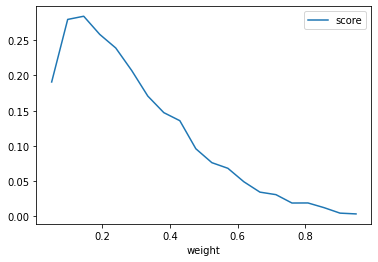

In [ ]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [ ]:
test_df.loc[:,col_x] = test_df.loc[:,col_x].fillna(method='ffill')
test_df.loc[:,col_x].isna().sum().sort_values(ascending=False)

Col915     1
Col677     1
Col913     1
Col38      1
Col527     1
Col877     1
Col914     1
Col874     1
Col876     1
Col330     1
Col875     1
Col380     0
Col2142    0
Col2232    0
Col431     0
Col2184    0
Col2052    0
Col243     0
Col1544    0
Col1592    0
Col180     0
Col2274    0
Col183     0
Col166     0
Col178     0
Col2322    0
Col51      0
Col1322    0
Col1412    0
Col240     0
Col437     0
Col440     0
Col1634    0
Col135     0
Col2094    0
Col1454    0
Col390     0
Col1502    0
Col636     0
Col59      0
Col2364    0
Col633     0
Col234     0
Col193     0
Col1364    0
Col186     0
Col627     0
Col127     0
Col577     0
dtype: int64

In [ ]:
sample = pd.read_csv('/content/sample_output.csv')
y_test = model.predict(test_df.loc[:,col_x])
print(sum(y_test))

995


In [ ]:
sample.drop(index=sample.index,inplace=True)
sample['Col1'] = test_df.iloc[:,0]
sample['Col2'] = y_test
#output file output.csv
sample.to_csv('output.csv',index=False)